In [1]:
import magmaforge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/thermoengine/calibrate.py:378: DeprecationWarning: invalid escape sequence \*
  [re.match(base+'[\*0-9]*', iname) is not None
/opt/conda/lib/python3.9/site-packages/thermoengine/calibrate.py:382: DeprecationWarning: invalid escape sequence \*
  [re.match(base+'\*', iname) is not None
/opt/conda/lib/python3.9/site-packages/thermoengine/equilibrate.py:4014: DeprecationWarning: invalid escape sequence \*
  """Sets the bulk composition of the system


In [2]:


def plot_phase_fractions(phase_frac_tbl, ax=None):
    mineral_frac_tbl = phase_frac_tbl.drop(columns=['Liquid','Water'])
    # mineral_frac_tbl.index = [int(iT-273) for iT in mineral_frac_tbl.index]
    mineral_frac_tbl.index = mineral_frac_tbl.index - 273
    fTOL = 1e-4
    cols = mineral_frac_tbl.max(axis=0)>fTOL

    mineral_frac_tbl.loc[::-1, cols].plot.bar(stacked=True, ax=ax)
    
    if ax is None:
        ax = plt.gca()
        
    ax.set_xlabel('Temp [C]')
    ax.set_ylabel('Mass Fraction')
    
def plot_magma_evolution(history):
    phase_frac_tbl = history.phase_frac_table
    
    liq_comp = history.liquid_comp_table
    liq_comp.index -= 273.15


    fig, ax = plt.subplots(nrows=3, sharex=False, squeeze=True, figsize=(5,10) )

    iax = ax[0]
    plot_phase_fractions(phase_frac_tbl, ax=iax)
    iax.set_xticklabels([])
    iax.set_xlabel('')

    iax=ax[1]
    liq_comp.plot(y=['MgO','FeO','Fe2O3','Al2O3','K2O','Na2O','H2O'], ax=iax).legend(loc='upper left')
    # iax.set_xlabel('Temp [C]')
    iax.set_ylabel('Magma Comp [wt%]')
    iax.set_xticklabels([])


    iax=ax[2]
    liq_comp.plot(y='SiO2', ax=iax, legend=True)
    iax.set_xlabel('Temp [C]')
    iax.set_ylabel('Magma Comp [wt%]')


In [3]:
comp={
    'BSE': {
        'SiO2': 45.97,
        'TiO2':  0.18,
        'Al2O3': 4.77,
        'Fe2O3': 1e-7,
        'FeO':   8.24,
        'MnO':   0.0,
        'MgO':  36.66,
        'CaO':   3.78,
        'Na2O':  0.35,
        'K2O':   0.04,},
}
# T0 = 1600.00+273+50
P = 10e3
T0 = 2200.0
Tfinal = 1600 + 273

In [8]:
sys_T = magmaforge.System(comp=comp['BSE'], T0=T0, P=P, melt_frac_cutoff=.15, Tfinal=Tfinal)
S0 = sys_T.total_entropy
S0

/home/jovyan/app/src/magmaforge/system.py:173: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elems = Liq.covert_endmember_comp(moles_end,output='moles_elements')
/opt/conda/lib/python3.9/site-packages/thermoengine/equilibrate.py:127: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elm = entry['obj'].covert_endmember_comp(


333.21647575519984

In [9]:
sys_T.melt_fraction

1.0

In [10]:
sys_T.crystallize(method='equil', Tstep=5);

In [16]:
1650+273

1923

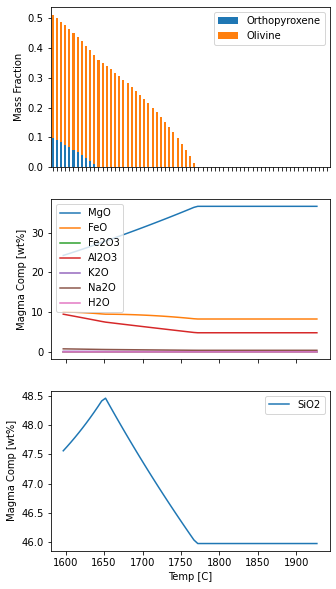

In [11]:
plot_magma_evolution(sys_T.history)

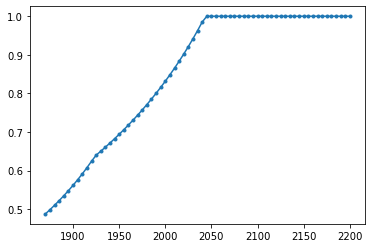

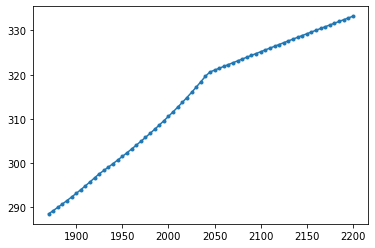

In [15]:
plt.figure()
plt.plot(sys_T.history.get_temps(), sys_T.history.get_melt_frac(),'.-')
plt.figure()
plt.plot(sys_T.history.get_temps(), sys_T.history.get_total_entropy(),'.-')

In [13]:
sys_S = magmaforge.System(comp=comp['BSE'], T0=T0, P=P, min_potential='H', S0=S0)

/home/jovyan/app/src/magmaforge/system.py:173: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elems = Liq.covert_endmember_comp(moles_end,output='moles_elements')
/opt/conda/lib/python3.9/site-packages/thermoengine/equilibrate.py:127: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elm = entry['obj'].covert_endmember_comp(


In [14]:
while(sys_S.mass_fraction > 0.15):
    sys_S.cool(dS=1)
    print(sys_S.T)
    if sys_S.T < Tfinal:
        break

/home/jovyan/app/src/magmaforge/system.py:441: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elems = phs.covert_endmember_comp(mol_endmem,output='moles_elements')


2187.2873199785927
2174.648100063242
2162.081915765395
2149.588345049396
2137.1669683183227
2124.8173683998893
2112.539130532437
2100.331842350999
2088.1950938734612
2076.128477486785
2064.1315879333215
2052.204022297196
2042.3049897715996
2038.398927437055
2034.3879336840164
2030.269885123889
2026.0424303673815
2021.7034267452223
2017.250743525357
2012.6824531567815
2007.9964333794424
2003.190866578645
1998.2639288701303
1993.2139035909106
1988.0393157491376
1982.7386148093697
1977.3104258588166
1971.7535924846602
1966.0670238672403
1960.2497850620907
1954.3010631589975
1948.2202473764758
1942.0068100701478
1935.6604051497018
1929.1808372544103
1922.8282279898303
1911.1527699181265


KeyboardInterrupt: 

Text(0, 0.5, 'Stot')

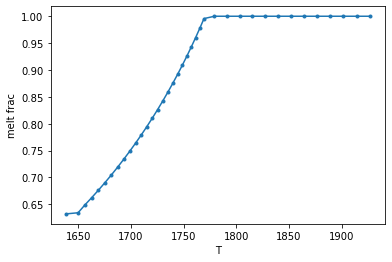

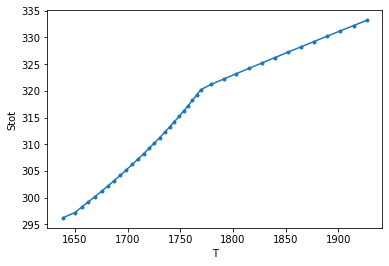

In [17]:
plt.figure()
plt.plot(sys_S.history.get_temps()-273, sys_S.history.get_melt_frac(),'.-')
plt.xlabel('T')
plt.ylabel('melt frac')
plt.figure()
plt.plot(sys_S.history.get_temps()-273, sys_S.history.get_total_entropy(),'.-')
plt.xlabel('T')
plt.ylabel('Stot')

In [23]:
sys_S.history.liquid_comp_table.index-273

Float64Index([            1927.0, 1914.2873199785927,  1901.648100063242,
               1889.081915765395, 1876.5883450493961, 1864.1669683183227,
              1851.8173683998893,  1839.539130532437,  1827.331842350999,
              1815.1950938734612,  1803.128477486785, 1791.1315879333215,
               1779.204022297196, 1769.3049897715996,  1765.398927437055,
              1761.3879336840164,  1757.269885123889, 1753.0424303673815,
              1748.7034267452223,  1744.250743525357, 1739.6824531567815,
              1734.9964333794424,  1730.190866578645, 1725.2639288701303,
              1720.2139035909106, 1715.0393157491376, 1709.7386148093697,
              1704.3104258588166, 1698.7535924846602, 1693.0670238672403,
              1687.2497850620907, 1681.3010631589975, 1675.2202473764758,
              1669.0068100701478, 1662.6604051497018, 1656.1808372544103,
              1649.8282279898303, 1638.1527699181265],
             dtype='float64')

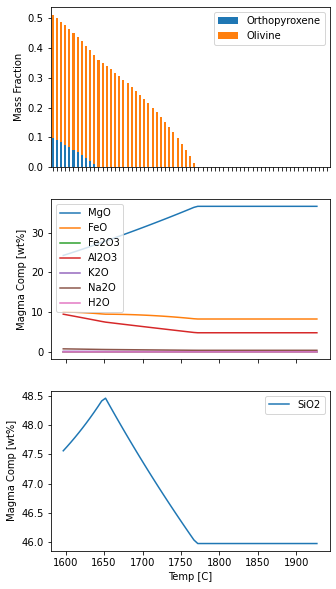

In [18]:
plot_magma_evolution(sys_T.history)

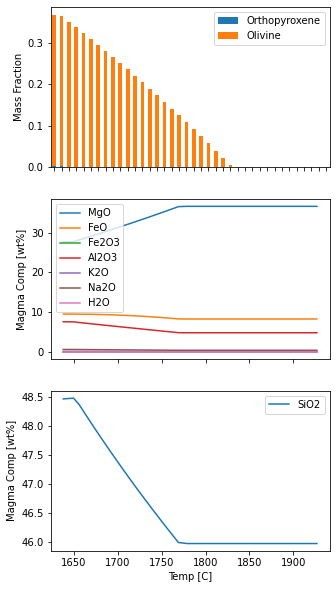

In [24]:
plot_magma_evolution(sys_S.history)

In [ ]:
def get_magma_evo_table(sys:magmaforge.System) -> pd.DataFrame:
    evo_tbl = sys.history.liquid_comp_table
    evo_tbl['rho'] = sys.history.get_liquid_densities()
    evo_tbl['rho_ref'] = sys.history.get_liquid_ref_densities()
    
    return evo_tbl

magma_evo_low = get_magma_evo_table(sys_low)
magma_evo_med = get_magma_evo_table(sys_med)
magma_evo_hi = get_magma_evo_table(sys_hi)



In [ ]:
def plot_TAS(magma_evo:pd.DataFrame, axs:list[plt.axis], color='', label='', rho_ref0=1):
    ax0 = axs[0]
    ax1 = axs[1]
    ind_SiO2_max = magma_evo['SiO2'].argmax()
    magma_evo = magma_evo.copy()
    
        
    
    magma_evo['TotAlk'] = magma_evo['Na2O'] + magma_evo['K2O']
    
    pre_Qz_evo = magma_evo.iloc[:ind_SiO2_max]
    post_Qz_evo = magma_evo.iloc[ind_SiO2_max:]
    # ax.plot(magma_evo['SiO2'], magma_evo['K2O']+magma_evo['Na2O'], '-', color=color, label=label)
    ax0.plot(pre_Qz_evo['SiO2'], pre_Qz_evo['TotAlk'], '-', color=color, label=label)
    ax0.plot(post_Qz_evo['SiO2'], post_Qz_evo['TotAlk'], ':', color=color)
    

    ax0.set_ylabel('Na$_2$O + K$_2$O  [wt%]')

    
    ax1.plot(pre_Qz_evo['SiO2'], 100*(pre_Qz_evo['rho_ref']/rho_ref0-1), '-', color=color, label=label)
    ax1.plot(post_Qz_evo['SiO2'], 100*(post_Qz_evo['rho_ref']/rho_ref0-1), ':', color=color)
    
    ax1.set_ylabel('Magma Density Change [%]')
    ax1.set_xlabel('SiO$_2$  [wt%]')


rho_ref0 = magma_evo_med.iloc[0]['rho_ref']


plt.figure()
fig, axs = plt.subplots(nrows=2, sharex=True, squeeze=True, figsize=(5,7) )
plot_TAS(magma_evo_hi, axs, color='r', label='NNO+3', rho_ref0=rho_ref0) 
plot_TAS(magma_evo_med, axs, color=[.5,.5,.5], label='NNO', rho_ref0=rho_ref0)
plot_TAS(magma_evo_low, axs, color='b', label='NNO-3', rho_ref0=rho_ref0)
plt.legend()